<h2> Description </h2>

The Club Mahindra Dataolympics competition was held over Analytics Vidhya platform.

The goal was to build the model to get prediction of <b> Amount Spent on Food & Bevrages per night </b>.

The dataset contains the 35K train set and 15K test set 



More details on link
https://datahack.analyticsvidhya.com/contest/club-mahindra-dataolympics/

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df_train=pd.read_csv('./Dataset/train.csv')
df_test=pd.read_csv('./Dataset/test.csv')

In [129]:
df_train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [130]:
df_test.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [131]:
df_train.shape

(341424, 24)

In [132]:
df_test.shape

(146765, 23)

<h3> Remove Unwanted Columns </h3>

<b> reservation_id</b>
<b> persontravellingid </b>

In [133]:
df_train=df_train.drop(columns=['reservation_id','persontravellingid'])
test_reservation_id=list(df_test['reservation_id'])
df_test=df_test.drop(columns=['reservation_id','persontravellingid'])

In [134]:
df_train.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,1.124209,7.720801
std,0.915311,0.823779,1.756062,0.758019,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,0.329821,1.090109
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397
25%,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.187260
50%,2.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.860814
75%,3.000000,3.000000,4.000000,0.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.419144
max,3.000000,7.000000,32.000000,13.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652


In [135]:
df_train.dtypes

booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code               object
resort_id                              object
amount_spent_per_room_night_scaled

<h1> Data Preprocessing </h1>

<h3> Step 1 </h3>

<b>Checking Missiing Values </b>



In [136]:
df_train.isnull().sum()

booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spent_per_room_night_scaled       0
dtype: int64

In [137]:
df_test.isnull().sum()

booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

<h3> Step 2 </h3>

<b>Missiing Values Imputation</b>
<br>
<br>
I prefer the missing values imputation using mode apporach
Fill all the missing values of #season_holidayed_code #state_code_residence with mode of that columns


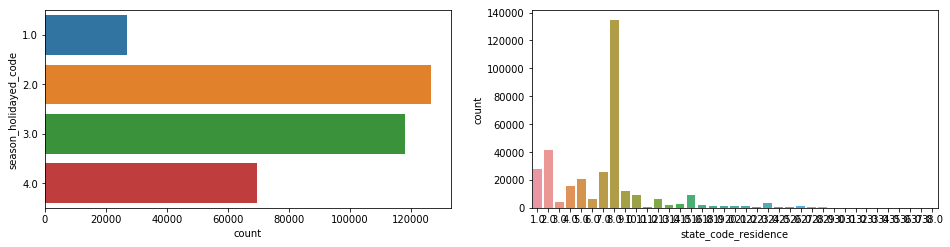

In [138]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot(y='season_holidayed_code',data=df_train)
plt.subplot(2,2,2)
sns.countplot(x='state_code_residence',data=df_train)

In [139]:
val=df_train['season_holidayed_code'].mode()[0]
df_train['season_holidayed_code']=df_train['season_holidayed_code'].fillna(val)
val=df_train['state_code_residence'].mode()[0]
df_train['state_code_residence']=df_train['state_code_residence'].fillna(val)

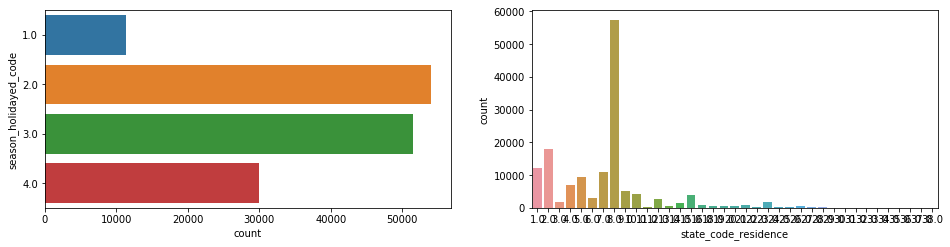

In [140]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot(y='season_holidayed_code',data=df_test)
plt.subplot(2,2,2)
sns.countplot(x='state_code_residence',data=df_test)

In [141]:
val=df_test['season_holidayed_code'].mode()[0]
df_test['season_holidayed_code']=df_test['season_holidayed_code'].fillna(val)
val=df_test['state_code_residence'].mode()[0]
df_test['state_code_residence']=df_test['state_code_residence'].fillna(val)

<h1> Feature Engineering </h1>

Using column <b>#booking_date</b> we can extract day, month and year 
for both train and test dataset

It will increase features which can give better results

In [142]:
#boooking day,month, year seprate column
df_train['Day_of_Booking']=pd.to_datetime(df_train.booking_date,format="%d/%m/%y").dt.day
df_train['Month_of_Booking']=pd.to_datetime(df_train.booking_date,format="%d/%m/%y").dt.month
#df_train['Year_of_Booking']=pd.to_datetime(df_train.booking_date,format="%d/%m/%y").dt.year
df_train=df_train.drop('booking_date',axis=1)

#boooking day,month, year seprate column
df_test['Day_of_Booking']=pd.to_datetime(df_test.booking_date,format="%d/%m/%y").dt.day
df_test['Month_of_Booking']=pd.to_datetime(df_test.booking_date,format="%d/%m/%y").dt.month
#df_test['Year_of_Booking']=pd.to_datetime(df_test.booking_date,format="%d/%m/%y").dt.year
df_test=df_test.drop('booking_date',axis=1)



Lets do it for column <b>#checkin_date


In [143]:
#chekin day,month, year seprate column

df_train['Day_of_Checkin']=pd.to_datetime(df_train.checkin_date,format="%d/%m/%y").dt.day
df_train['Month_of_Checkin']=pd.to_datetime(df_train.checkin_date,format="%d/%m/%y").dt.month
df_train['Year_of_Checkin']=pd.to_datetime(df_train.checkin_date,format="%d/%m/%y").dt.year

df_test['Day_of_Checkin']=pd.to_datetime(df_test.checkin_date,format="%d/%m/%y").dt.day
df_test['Month_of_Checkin']=pd.to_datetime(df_test.checkin_date,format="%d/%m/%y").dt.month
df_test['Year_of_Checkin']=pd.to_datetime(df_test.checkin_date,format="%d/%m/%y").dt.year



Lets do it for column <b>#checkout_date


In [144]:
#chekin day,month, year seprate column
df_train['Day_of_Checkout']=pd.to_datetime(df_train.checkout_date,format="%d/%m/%y").dt.day
df_train['Month_of_Checkout']=pd.to_datetime(df_train.checkout_date,format="%d/%m/%y").dt.month
df_train['Year_of_Checkout']=pd.to_datetime(df_train.checkout_date,format="%d/%m/%y").dt.year
df_train=df_train.drop('checkout_date',axis=1)

#chekin day,month, year seprate column
df_test['Day_of_Checkout']=pd.to_datetime(df_test.checkout_date,format="%d/%m/%y").dt.day
df_test['Month_of_Checkout']=pd.to_datetime(df_test.checkout_date,format="%d/%m/%y").dt.month
df_test['Year_of_Checkout']=pd.to_datetime(df_test.checkout_date,format="%d/%m/%y").dt.year
df_test=df_test.drop('checkout_date',axis=1)

Using Chekindate we can add one more column Weekday 

<b>0 -> Monday

6 -> Sunday

In [145]:
# Add one more column whether checkin is done on weekend 

df_train['Checkin_Weekday'] = pd.DatetimeIndex(df_train.checkin_date).dayofweek
df_test['Checkin_Weekday'] = pd.DatetimeIndex(df_test.checkin_date).dayofweek

# drop the checkin date columns for both train and test
df_test=df_test.drop('checkin_date',axis=1)
df_train=df_train.drop('checkin_date',axis=1)

In [146]:
df_train.head(5)

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,...,amount_spent_per_room_night_scaled,Day_of_Booking,Month_of_Booking,Day_of_Checkin,Month_of_Checkin,Year_of_Checkin,Day_of_Checkout,Month_of_Checkout,Year_of_Checkout,Checkin_Weekday
0,3,1,2,0,3,3,3,1,2.0,7.0,...,7.706428,5,4,5,4,2018,6,4,2018,4
1,1,1,2,0,3,3,4,5,2.0,7.0,...,6.662563,23,1,11,4,2015,16,4,2015,2
2,1,1,2,0,1,5,4,4,2.0,7.0,...,7.871602,28,1,1,2,2015,5,2,2015,4
3,1,1,2,2,2,2,3,5,2.0,7.0,...,5.344943,2,5,11,6,2015,16,6,2015,4
4,1,1,2,0,2,2,4,5,2.0,7.0,...,7.059346,2,9,14,12,2015,19,12,2015,0


In [147]:
df_test.head(5)

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,...,resort_id,Day_of_Booking,Month_of_Booking,Day_of_Checkin,Month_of_Checkin,Year_of_Checkin,Day_of_Checkout,Month_of_Checkout,Year_of_Checkout,Checkin_Weekday
0,3,2,2,0,3,3,4,1,2.0,2.0,...,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...,5,4,5,4,2018,6,4,2018,4
1,1,2,4,0,1,1,4,8,2.0,2.0,...,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...,24,5,23,6,2015,27,6,2015,1
2,3,2,3,0,2,2,2,3,4.0,2.0,...,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,21,7,7,8,2015,10,8,2015,2
3,1,2,3,0,1,1,2,3,2.0,2.0,...,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,31,7,22,10,2015,25,10,2015,3
4,1,2,4,0,1,2,3,8,2.0,2.0,...,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,1,7,1,10,2016,5,10,2016,6


<h1> Data Visualization </h1>

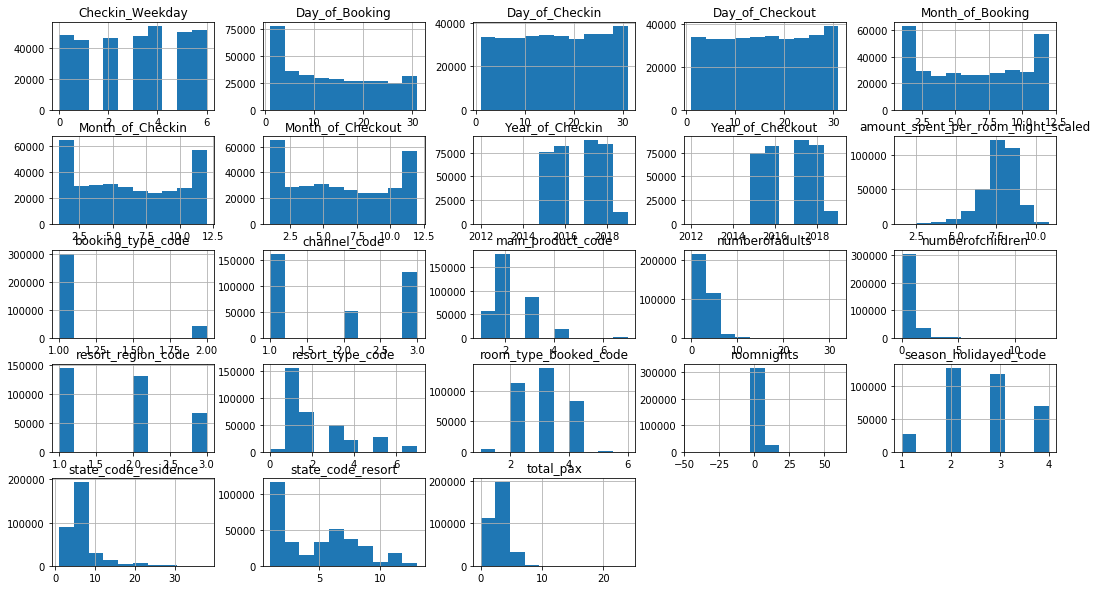

In [148]:
df_train.hist(figsize=(18,10))
plt.show()


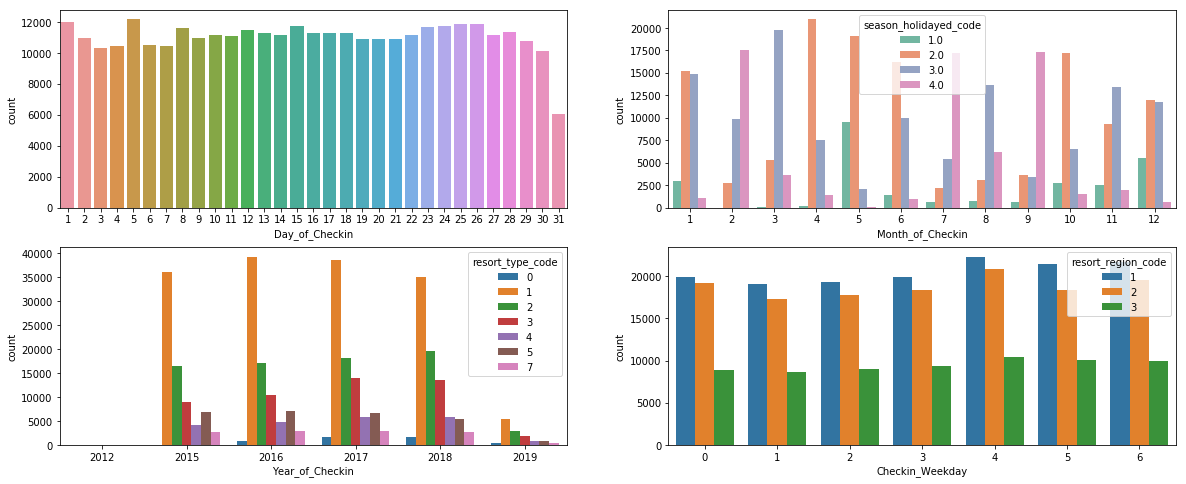

In [149]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.countplot(x='Day_of_Checkin',data=df_train)
plt.subplot(2,2,2)
sns.countplot(x='Month_of_Checkin',hue="season_holidayed_code",data=df_train,palette="Set2")
plt.subplot(2,2,3)
sns.countplot(x='Year_of_Checkin',hue='resort_type_code',data=df_train)
plt.subplot(2,2,4)
sns.countplot(x='Checkin_Weekday',hue='resort_region_code',data=df_train)

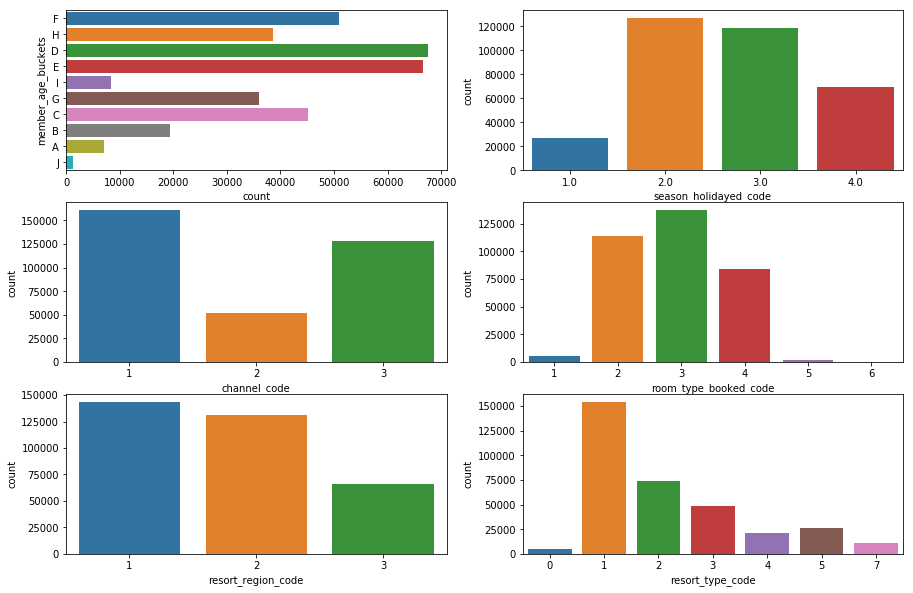

In [150]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(y='member_age_buckets',data=df_train)
plt.subplot(3,2,2)
sns.countplot(x='season_holidayed_code',data=df_train)

plt.subplot(3,2,3)
sns.countplot(x='channel_code',data=df_train)

plt.subplot(3,2,4)
sns.countplot(x='room_type_booked_code',data=df_train)

plt.subplot(3,2,5)
sns.countplot(x='resort_region_code',data=df_train)

plt.subplot(3,2,6)
sns.countplot(x='resort_type_code',data=df_train)

In [151]:
df_train['reservationstatusid_code']=df_train['reservationstatusid_code'].replace({'B':'other','C':'other','D':'other'})
print(df_train['reservationstatusid_code'].value_counts())

A        312481
other     28943
Name: reservationstatusid_code, dtype: int64


In [152]:
df_test['reservationstatusid_code'].value_counts()
df_test['reservationstatusid_code']=df_test['reservationstatusid_code'].replace({'B':'other','C':'other','D':'other'})
df_test['reservationstatusid_code'].value_counts()

A        134262
other     12503
Name: reservationstatusid_code, dtype: int64

In [153]:
df_train['room_type_booked_code'].value_counts()
df_train['room_type_booked_code']=df_train['room_type_booked_code'].replace({1:5,5:5,6:5})
df_train['room_type_booked_code'].value_counts()

3    137439
2    113459
4     83554
5      6972
Name: room_type_booked_code, dtype: int64

In [154]:
df_test['room_type_booked_code'].value_counts()
df_test['room_type_booked_code']=df_test['room_type_booked_code'].replace({1:5,5:5,6:5})
df_test['room_type_booked_code'].value_counts()

3    58999
2    48988
4    35806
5     2972
Name: room_type_booked_code, dtype: int64

In [155]:
df_test['season_holidayed_code']=df_test['season_holidayed_code'].astype(int)
df_test['season_holidayed_code'].value_counts()

2    54128
3    51453
4    29889
1    11295
Name: season_holidayed_code, dtype: int64

<h3> Correlation Matrix </h3>

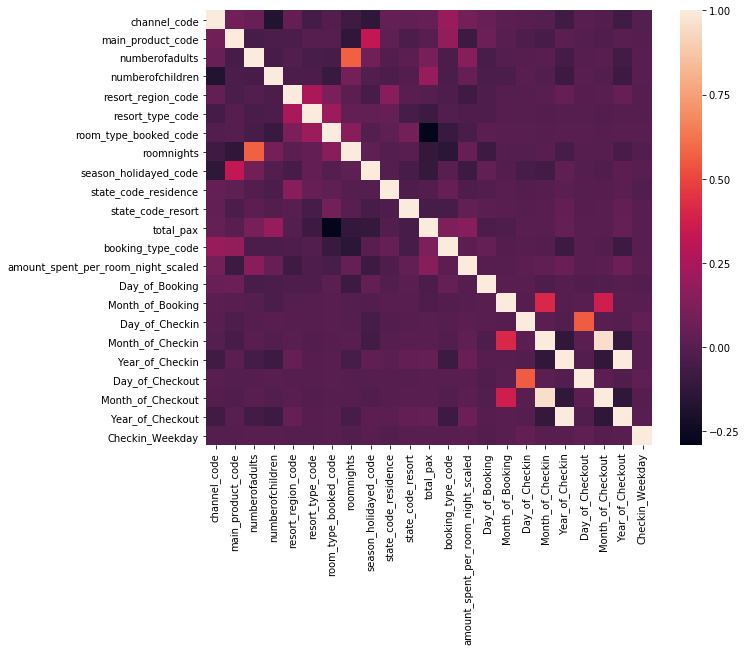

In [156]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr())

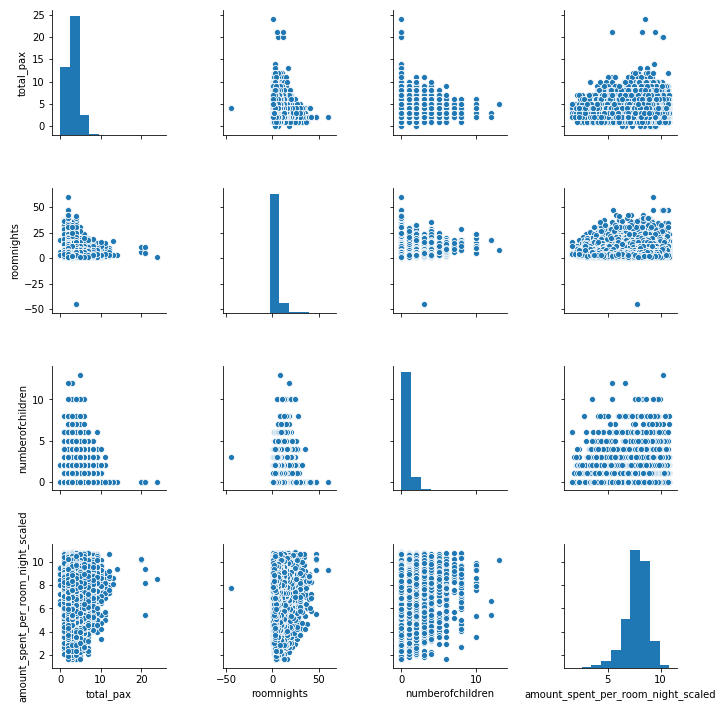

In [157]:
sns.pairplot(data=df_train,vars=['total_pax','roomnights','numberofchildren','amount_spent_per_room_night_scaled',])

<h1> Outlier Detection and Removal </h1>

<h3> Box Plot to visualize outlier </h3>

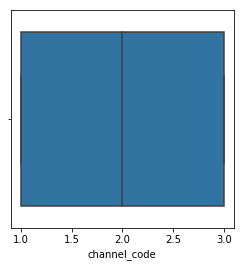

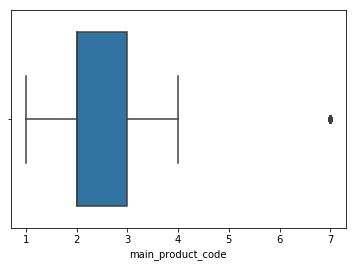

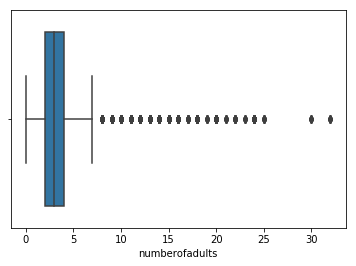

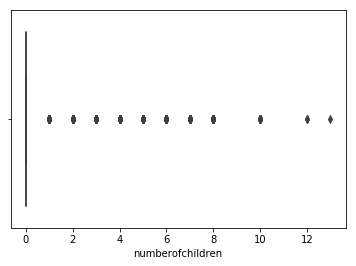

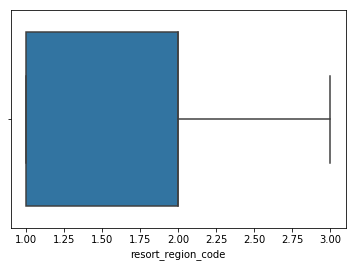

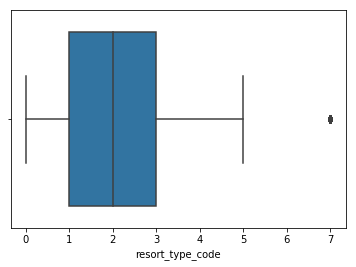

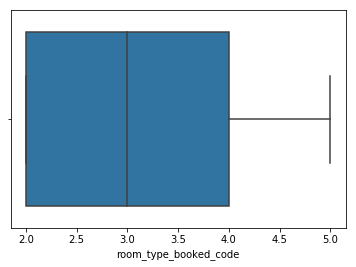

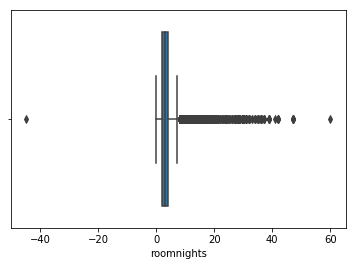

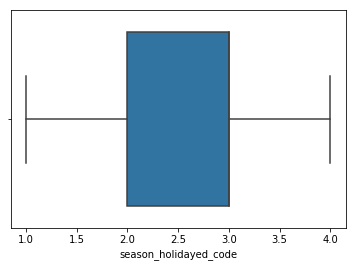

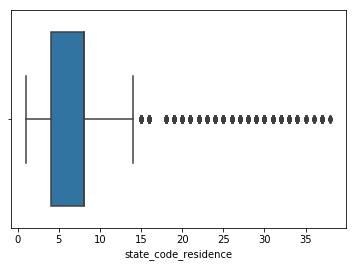

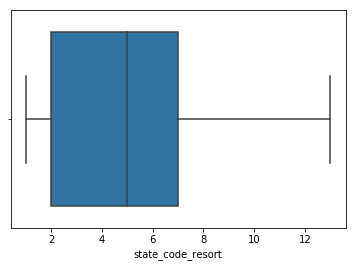

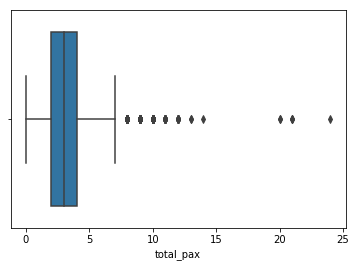

TypeError: cannot perform reduce with flexible type

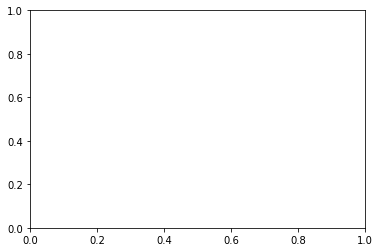

In [158]:
plt.figure(figsize=(4,4))
for col in df_train.columns:
    sns.boxplot(x=col,data=df_train)
    plt.show()

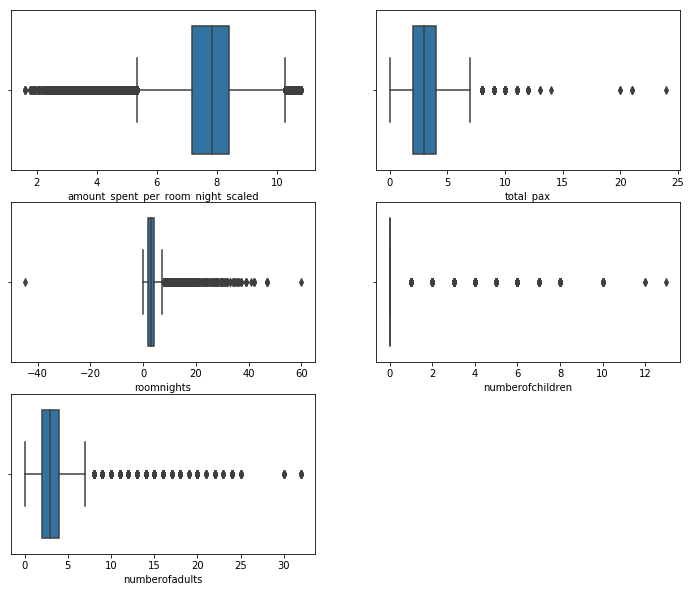

In [159]:
# few columns outlier visualization

def showOutlier():
    plt.figure(figsize=(12,10))
    plt.subplot(3,2,1)
    sns.boxplot(x='amount_spent_per_room_night_scaled',data=df_train)
    plt.subplot(3,2,2)
    sns.boxplot(x='total_pax',data=df_train)
    plt.subplot(3,2,3)
    sns.boxplot(x='roomnights',data=df_train)
    plt.subplot(3,2,4)
    sns.boxplot(x='numberofchildren',data=df_train)
    plt.subplot(3,2,5)
    sns.boxplot(x='numberofadults',data=df_train)
showOutlier()


We can clearly see that the columns above have more outliers

Like <b>#roomnights </b> #-45 how it could be possible

<b>Maximum Number of adults 33-35

<b>Maximum Number of childerns 12
    
To build an accurate model outlier handling is the most important steps
So lets do it
    

In [160]:
Q1=df_train['numberofadults'].quantile(0.25)
Q3=df_train['numberofadults'].quantile(0.75)
IQR=Q3-Q1

df_train[((df_train['numberofadults']<Q1-1.5*IQR)|(df_train['numberofadults']>Q3+1.5*IQR))].head(5)
df_train=df_train[~((df_train['numberofadults']<Q1-1.5*IQR)|(df_train['numberofadults']>Q3+1.5*IQR))]

In [161]:
Q1=df_train['roomnights'].quantile(0.25)
Q3=df_train['roomnights'].quantile(0.75)
IQR=Q3-Q1

df_train=df_train[~((df_train['roomnights']<Q1-1.5*IQR)|(df_train['roomnights']>Q3+1.5*IQR))]

In [162]:
df_train=df_train[~(df_train['numberofchildren']>3)]

In [163]:
Q1=df_train['total_pax'].quantile(0.25)
Q3=df_train['total_pax'].quantile(0.75)
IQR=Q3-Q1

#df_train[~((df_train['amount_spent_per_room_night_scaled']<Q1-1.5*IQR)|(df_train['amount_spent_per_room_night_scaled']>Q3+1.5*IQR))].head(10)
df_train=df_train[~((df_train['total_pax']<Q1-1.5*IQR)|(df_train['total_pax']>Q3+1.5*IQR))]

In [164]:
Q1=df_train['amount_spent_per_room_night_scaled'].quantile(0.25)
Q3=df_train['amount_spent_per_room_night_scaled'].quantile(0.75)
IQR=Q3-Q1

# we used 1.75 to detect outlier because amount_spent_per_room_night_scaled columns has more outliers
df_train=df_train[~((df_train['amount_spent_per_room_night_scaled']<Q1-(1.75*IQR))|(df_train['amount_spent_per_room_night_scaled']>Q3+(1.75*IQR)))]

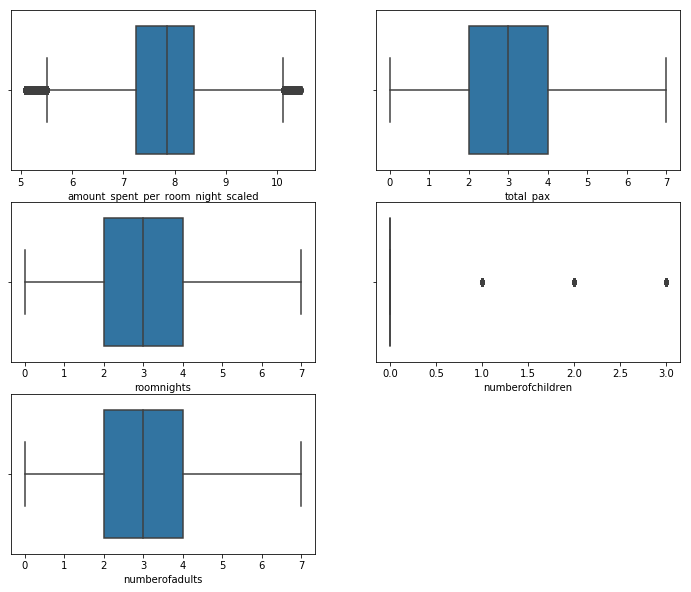

In [165]:
#call function and check outlier
showOutlier()

We can see the data's are withing range

but columns number of childer and amount_spent_per_room_night_scaled still 

has some outlier but very good compare to previous

<h2> Label Encoding </h2>

Now we are done with all of data preproessing and feature engineering steps 

Now only steps remain to convert categorical data to unique number (called <b>label encdoing or one hot encoding<b>)

In [166]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df_train['memberid']=le.fit_transform(df_train['memberid'])
df_train['resort_id']=le.fit_transform(df_train['resort_id'])

df_train[['memberid','resort_id']].head(5)

,memberid,resort_id
0,23194,7
1,23194,1
2,23194,9
3,23194,25
4,23194,25


In [167]:
#Note we use the same label encoder object for train and test data.
# We must use the same object otherwise both's data encoding will be done differently
df_test['memberid']=le.fit_transform(df_test['memberid'])
df_test['resort_id']=le.fit_transform(df_test['resort_id'])
df_test[['memberid','resort_id']].head(5)

,memberid,resort_id
0,5518,20
1,5518,28
2,5518,25
3,5518,5
4,5518,27


In [168]:
df_train.shape,df_test.shape

((301154, 28), (146765, 27))

<h2> Dummies Data (One Hot Encoding ) </h2>

Convert the categorical data into pandas get dummies
Pandas get dummies is same as one hot encoding

<b> Columns </b><br>
<b>member_age_buckets,reservationstatusid_code,cluster_code,room_type_booked_code,resort_type_code

In [169]:
df_train=pd.concat([df_train.drop('member_age_buckets',axis=1),pd.get_dummies(df_train['member_age_buckets'],prefix='member_age_buckets')],axis=1)
df_train=pd.concat([df_train.drop('reservationstatusid_code',axis=1),pd.get_dummies(df_train['reservationstatusid_code'],prefix='reservation_code')],axis=1)
df_train=pd.concat([df_train.drop('cluster_code',axis=1),pd.get_dummies(df_train['cluster_code'],prefix='cluster')],axis=1)
df_train=pd.concat([df_train.drop('room_type_booked_code',axis=1),pd.get_dummies(df_train['room_type_booked_code'],prefix='room_type_booked_code')],axis=1)
df_train=pd.concat([df_train.drop('resort_type_code',axis=1),pd.get_dummies(df_train['resort_type_code'],prefix='resort_type_code')],axis=1)
df_train.head()

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,...,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,resort_type_code_0,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7
0,3,1,2,0,3,1,2.0,7.0,3,3,...,1,0,0,0,0,0,1,0,0,0
1,1,1,2,0,3,5,2.0,7.0,5,2,...,0,1,0,0,0,0,1,0,0,0
2,1,1,2,0,1,4,2.0,7.0,1,2,...,0,1,0,0,0,0,0,0,1,0
3,1,1,2,2,2,5,2.0,7.0,2,2,...,1,0,0,0,0,1,0,0,0,0
4,1,1,2,0,2,5,2.0,7.0,2,2,...,0,1,0,0,0,1,0,0,0,0


In [170]:
df_test=pd.concat([df_test.drop('member_age_buckets',axis=1),pd.get_dummies(df_test['member_age_buckets'],prefix='member_age_buckets')],axis=1)
df_test=pd.concat([df_test.drop('reservationstatusid_code',axis=1),pd.get_dummies(df_test['reservationstatusid_code'],prefix='reservation_code')],axis=1)
df_test=pd.concat([df_test.drop('cluster_code',axis=1),pd.get_dummies(df_test['cluster_code'],prefix='cluster')],axis=1)
df_test=pd.concat([df_test.drop('room_type_booked_code',axis=1),pd.get_dummies(df_test['room_type_booked_code'],prefix='room_type_booked_code')],axis=1)
df_test=pd.concat([df_test.drop('resort_type_code',axis=1),pd.get_dummies(df_test['resort_type_code'],prefix='resort_type_code')],axis=1)
df_test.head()

,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,...,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,resort_type_code_0,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7
0,3,2,2,0,3,1,2,2.0,3,3,...,0,1,0,0,0,0,1,0,0,0
1,1,2,4,0,1,8,2,2.0,4,2,...,0,1,0,0,1,0,0,0,0,0
2,3,2,3,0,2,3,4,2.0,2,3,...,0,0,0,0,0,1,0,0,0,0
3,1,2,3,0,1,3,2,2.0,6,3,...,0,0,0,0,1,0,0,0,0,0
4,1,2,4,0,1,8,2,2.0,11,2,...,1,0,0,0,0,1,0,0,0,0


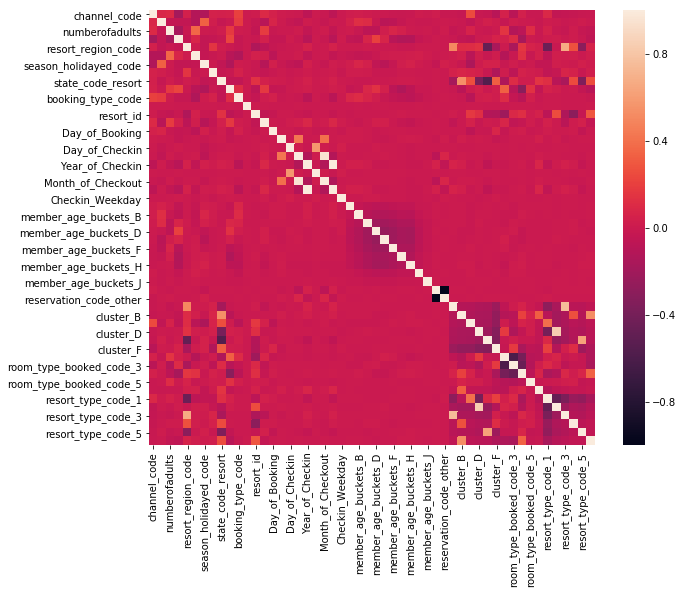

In [171]:
#correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr())

<b>Wow...our dataset looks more correlated compare to initial matrix Great...
    
we have done data preprocessing feature engineering and data encoding

In [172]:
df_train.shape

(301154, 52)

In [173]:
df_test.shape

(146765, 51)

<h1> Model Building </h1>

Feature and Target Extraction

X contains features

y contains target -> amount_spent_per_room_night_scaled values

We will train the dataset on 10K records and check how model works

In [174]:
X=df_train.drop(columns=['amount_spent_per_room_night_scaled'])
y=df_train['amount_spent_per_room_night_scaled']
X_test_main=df_test
X=X[:100000]
y=y[:100000]

Let's split 20% of train data for testing.
Later We will check model performance over full test data

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate=0.2,max_features=24,min_samples_leaf=8)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

rmse=100*np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

81.06944552777375


<h2> Cross Validation </h2>
    
Let's do cross validation and check how our model works on 10 different folds

In [177]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
rmse_score=np.sqrt(-score)*100
print(rmse_score)
print(rmse_score.mean())
print(rmse_score.std())

[82.14854454 80.59558239 79.94875484 80.32381865 81.6320521  80.30137135
 80.18932164 81.01396678 83.02754688 81.55516302]
81.07361221910227
0.9463073949926946


<h2> Actual Prediction on test dataset </h2>

In [178]:
y_pred=reg.predict(X_test_main)

<h3> Store the prediction in CSV file </h3>

In [179]:
import csv
from itertools import zip_longest
d = [test_reservation_id, y_pred]
export_data = zip_longest(*d, fillvalue = '')
with open('./Submission/ClubMahindra-Prediction.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("reservation_id", "amount_spent_per_room_night_scaled"))
      wr.writerows(export_data)
myfile.close()

<h3> Note </h3>

<b>The same model was build on various algorithms</b>

<ol>
<li>Decision Trees</li>
<li>Random Forest Regression</li>
<li>KNN</li>
<li>Ada Boost Regression</li>
</ol>

<b>But Gradient Boosting algorithm performed very well compate to others algorithms</b>
    
Email me : <a>developer.mrkhan7@gmail.com </a>